In [1]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('cleaned data.csv')
df.head()


,Unnamed: 0,title,company,rating,CITY,state,salary_year_mean
0,0,Data Scientist,ForMotiv,NaN,Remote,REMOTE,97500.0
1,1,Entry Level - Associate Data Scientist,IBM,3.9,Austin,TX,NaN
2,2,Data Entry,TransPerfect Translations Inc.,NaN,Remote,REMOTE,NaN
3,3,Data Scientist (36776),RCI,NaN,Cambridge,MA,142477.5
4,4,Data Scientist - Entry Level,Numerdox,NaN,Sacramento,CA,NaN


In [3]:
df=df[['title', 'company', 'rating','CITY', 'state'
        ,'salary_year_mean']]

In [20]:
import seaborn as sns

In [21]:
#df.set_index('state', inplace= True)
df2 = df[df.index.value_counts()>3]# delete the outliers
df2

C:\Users\narge\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,state,title,company,rating,CITY,salary_year_mean


In [22]:
df_2= df2.dropna().groupby('state').mean().sort_values(by=['salary_year_mean'])

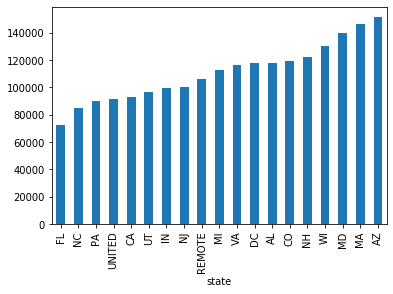

In [7]:
##get bar plot base on states and mean of salary
df_2['salary_year_mean'].plot(kind='bar')
plt.xticks(rotation=90);
#notice that united means the jobs which are located out of country

In [19]:
plt.figure(figsize=(9,6), dpi=150)
sns.barplot(data=df_2, x=df_2.index, y='salary_year_mean')
plt.xticks(rotation=90);#same plot but bigger

NameError: name 'sns' is not defined

<Figure size 1350x900 with 0 Axes>

In [9]:
df=df2.reset_index()
df

,state,title,company,rating,CITY,salary_year_mean
0,REMOTE,Data Scientist,ForMotiv,NaN,Remote,97500.0
1,TX,Entry Level - Associate Data Scientist,IBM,3.9,Austin,NaN
2,REMOTE,Data Entry,TransPerfect Translations Inc.,NaN,Remote,NaN
3,MA,Data Scientist (36776),RCI,NaN,Cambridge,142477.5
4,CA,Data Scientist - Entry Level,Numerdox,NaN,Sacramento,NaN
...,...,...,...,...,...,...
2258,DC,Machine Learning Engineer,Comcast,3.7,Washington,NaN
2259,CO,Data Science Engineer,"BioIntelliSense , Inc.",NaN,Golden,NaN
2260,CA,Senior Software Engineer - Machine Learning,Intuit,4.2,Mountain View,NaN
2261,CA,Sr. Data Analyst -Japanese Bilingual,"Pasona N A, Inc.",3.8,Cypress,80000.0


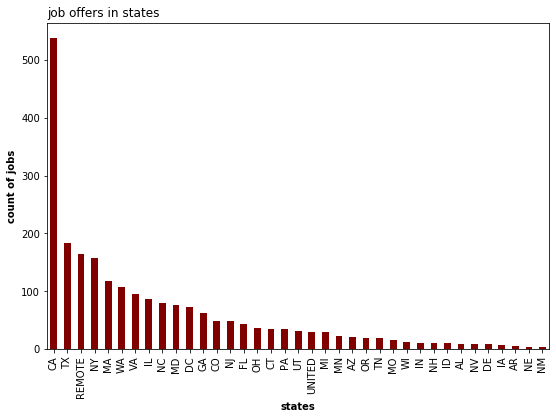

In [10]:
#bar plot for count of jobs in states
fig, ax = plt.subplots(figsize=(9,6))
df['state'].value_counts().plot(kind='bar',color ='maroon')
plt.xticks(rotation=90)
ax.set_title('job offers in states', 
             loc ='left', ) 
plt.xlabel('states', fontweight ='bold') 
plt.ylabel('count of jobs', fontweight ='bold') ;

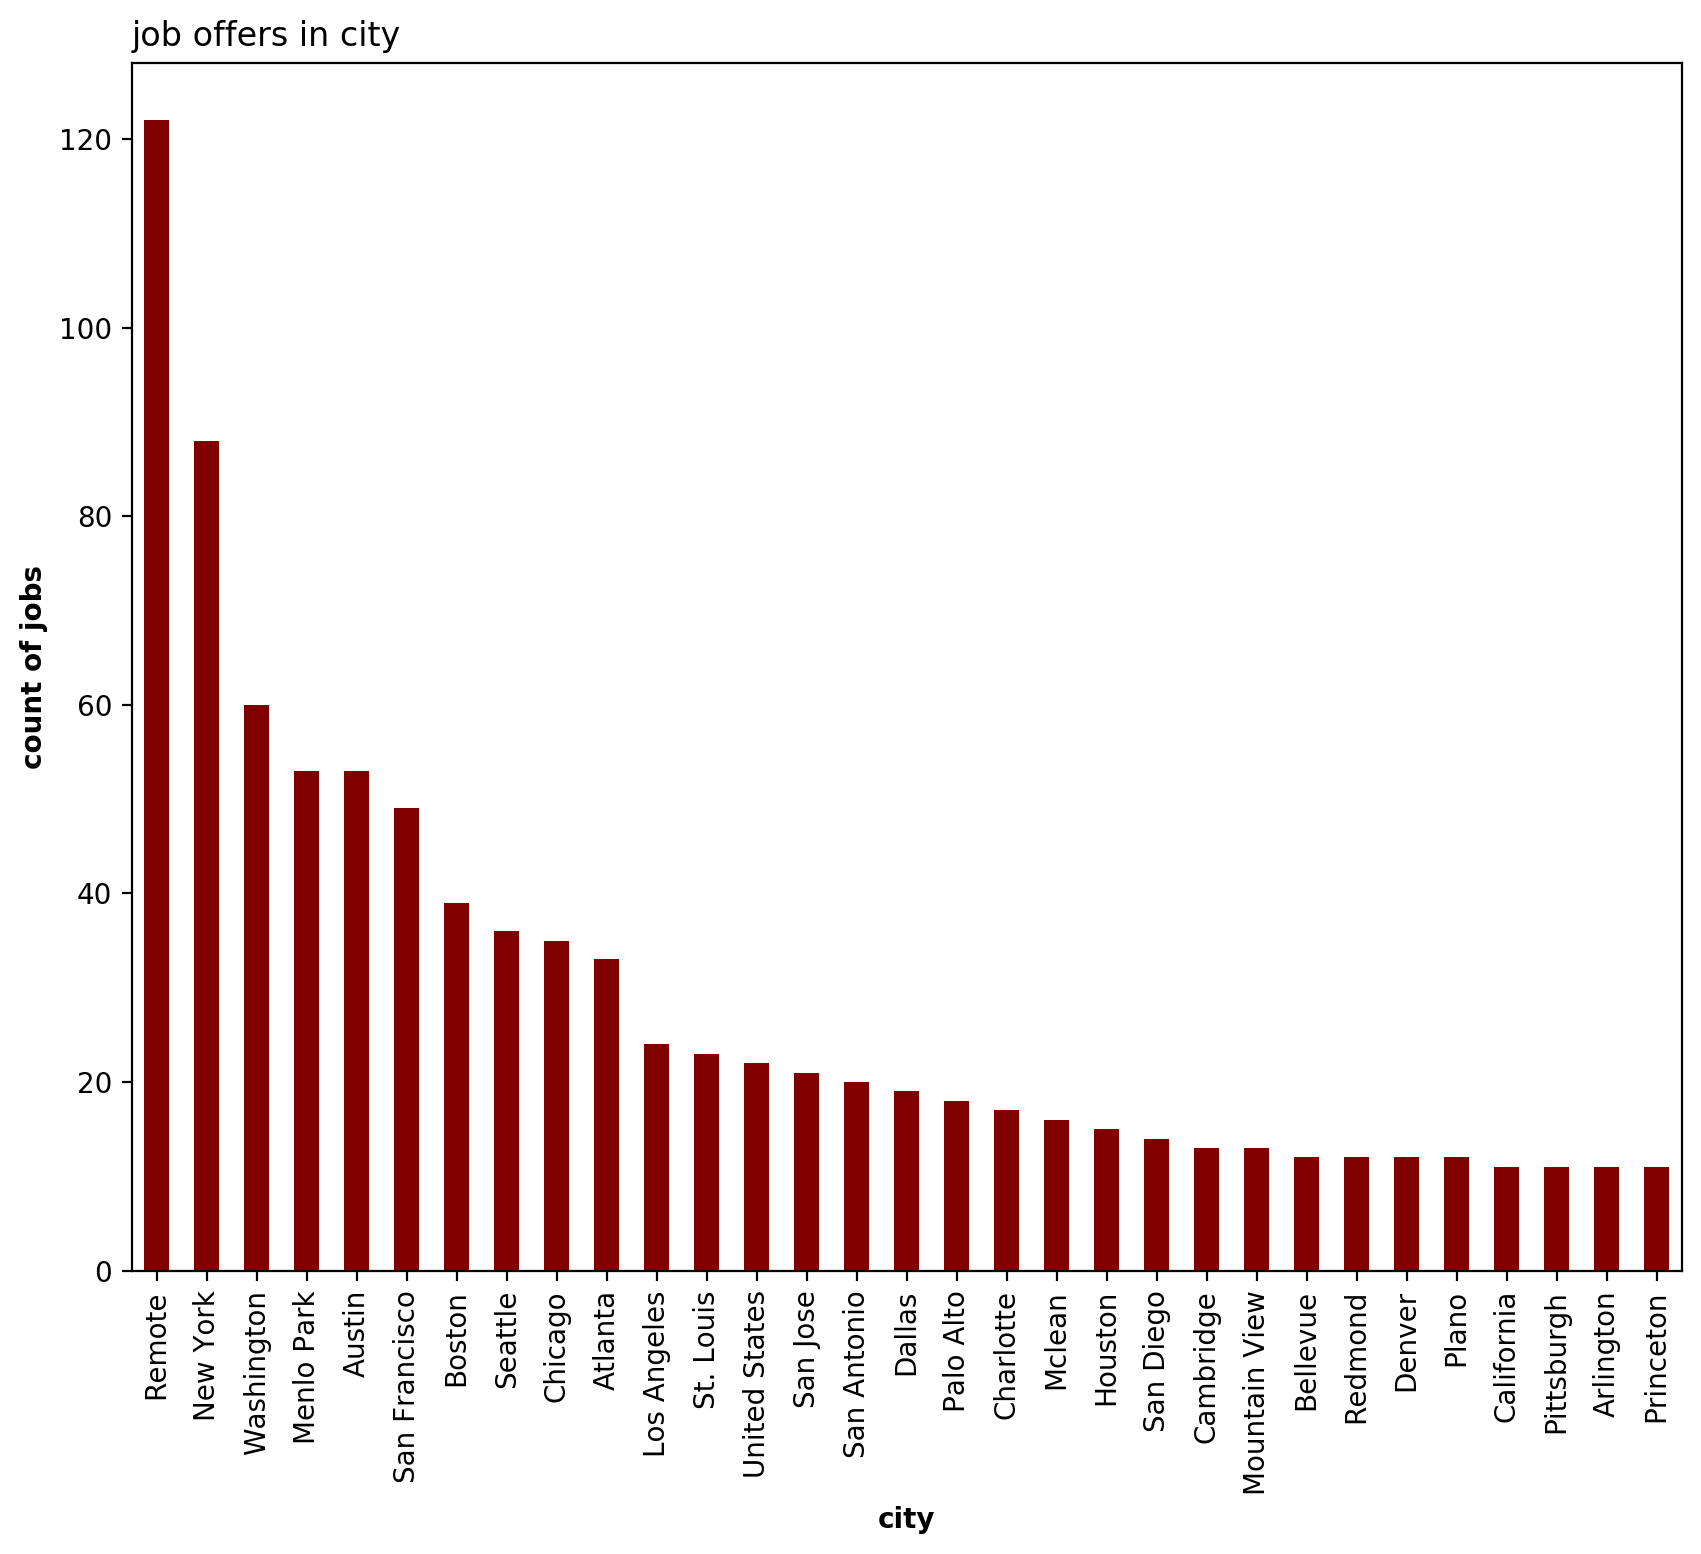

In [18]:
#bar plot for count of jobs in cities
fig, ax = plt.subplots(figsize=(10,8), dpi=200)
df['CITY'].value_counts()[df['CITY'].value_counts()>10].plot(kind='bar',color ='maroon')
plt.xticks(rotation=90)
ax.set_title('job offers in city', 
             loc ='left', ) 
plt.xlabel('city', fontweight ='bold') 
plt.ylabel('count of jobs', fontweight ='bold') ;

In [13]:
df3=df.set_index(['state','CITY'])
df3.head(20)

,,title,company,rating,salary_year_mean
state,CITY,,,,
REMOTE,Remote,Data Scientist,ForMotiv,NaN,97500.0
TX,Austin,Entry Level - Associate Data Scientist,IBM,3.9,NaN
REMOTE,Remote,Data Entry,TransPerfect Translations Inc.,NaN,NaN
MA,Cambridge,Data Scientist (36776),RCI,NaN,142477.5
CA,Sacramento,Data Scientist - Entry Level,Numerdox,NaN,NaN
TX,San Antonio,Data Scientist - Remote Nationwide,UnitedHealth Group,3.7,NaN
UT,Lehi,Junior Data Scientist,Jane.com,3.8,NaN
REMOTE,Remote,Data Science Intern,Noodle,4.4,35100.0
TX,Austin,Data Scientist,Valkyrie Intelligence,NaN,100000.0


In [18]:
len(df['state'].unique())

37

In [19]:
df_3 = df.dropna().groupby('CITY').mean().sort_values(by=['salary_year_mean'])#get mean

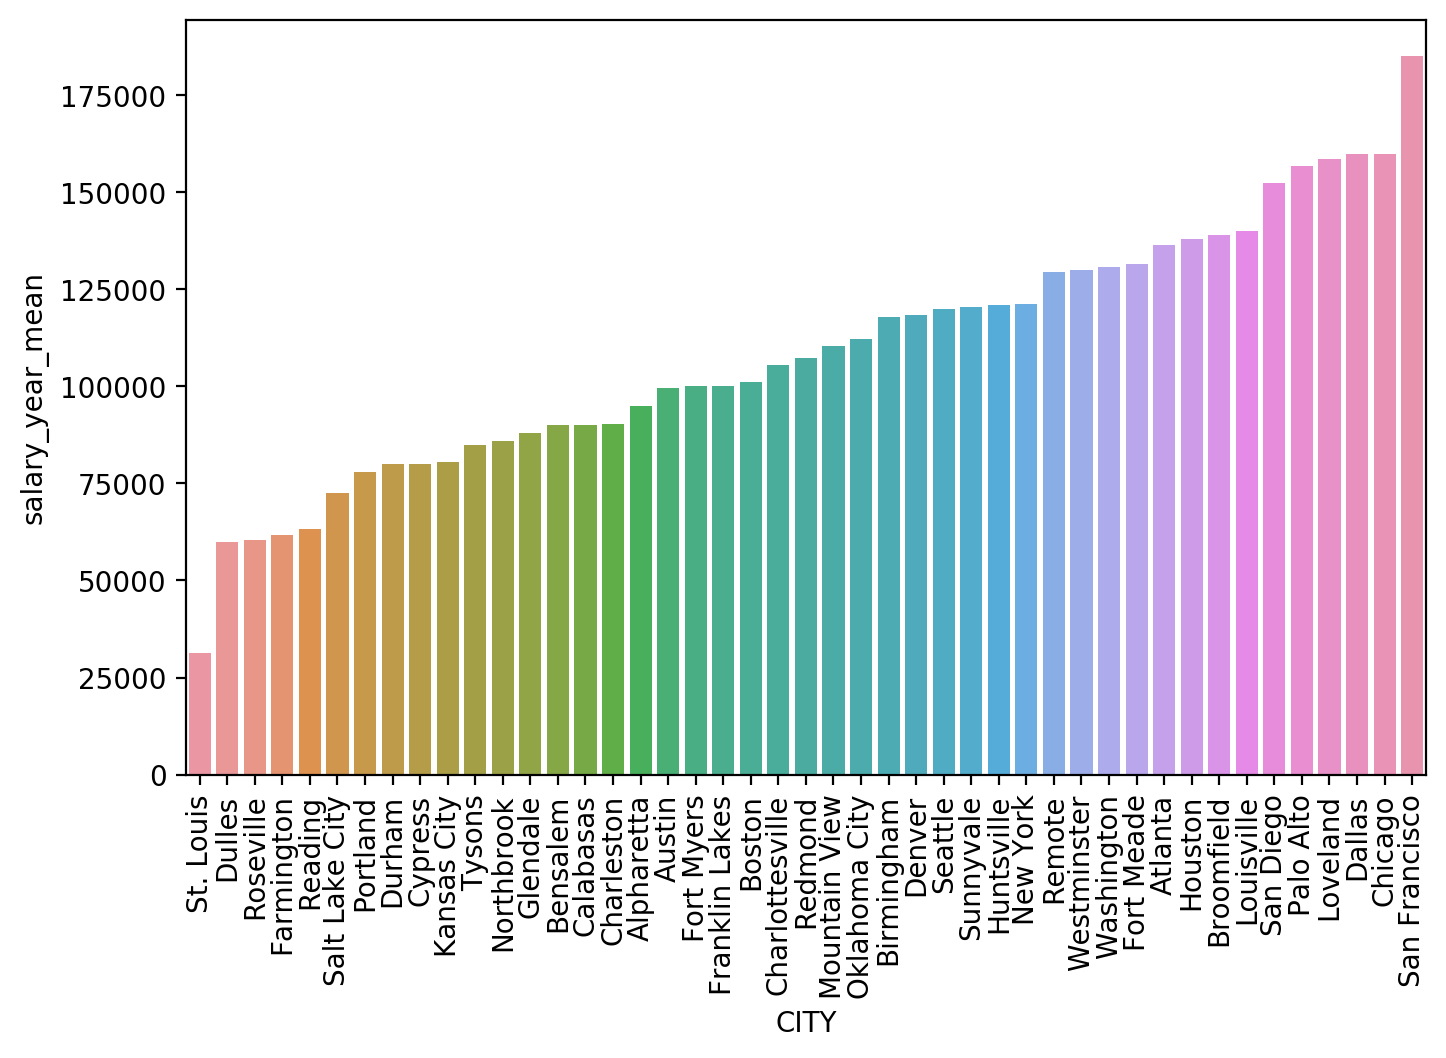

In [20]:
#get bar plot base on city and mean of salary
plt.figure(figsize=(8,5), dpi=200)
sns.barplot(data=df_3, x=df_3.index, y='salary_year_mean')
plt.xticks(rotation=90);#sorted plot

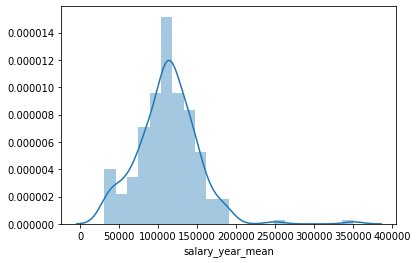

In [75]:
sns.distplot(df['salary_year_mean'])

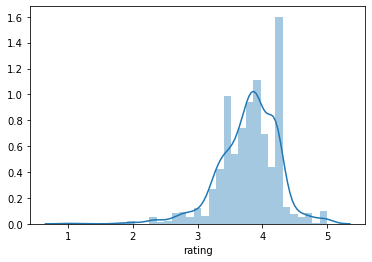

In [13]:
sns.distplot(df['rating'])

In [14]:
df.head()

,title,company,rating,CITY,state,salary_year_mean
0,Data Scientist,United Medical Credit,NaN,Remote,REMOTE,115000.0
1,Data Scientist Apprentice,IBM,3.9,United States,UNITED,NaN
2,Data Scientist - Entry Level,Numerdox,NaN,Sacramento,CA,NaN
3,Data Classification Specialist - Contract,Idiomatic,NaN,Remote,REMOTE,39000.0
4,"Data Scientist, Analytics, Intern",Facebook,4.2,Remote,REMOTE,NaN


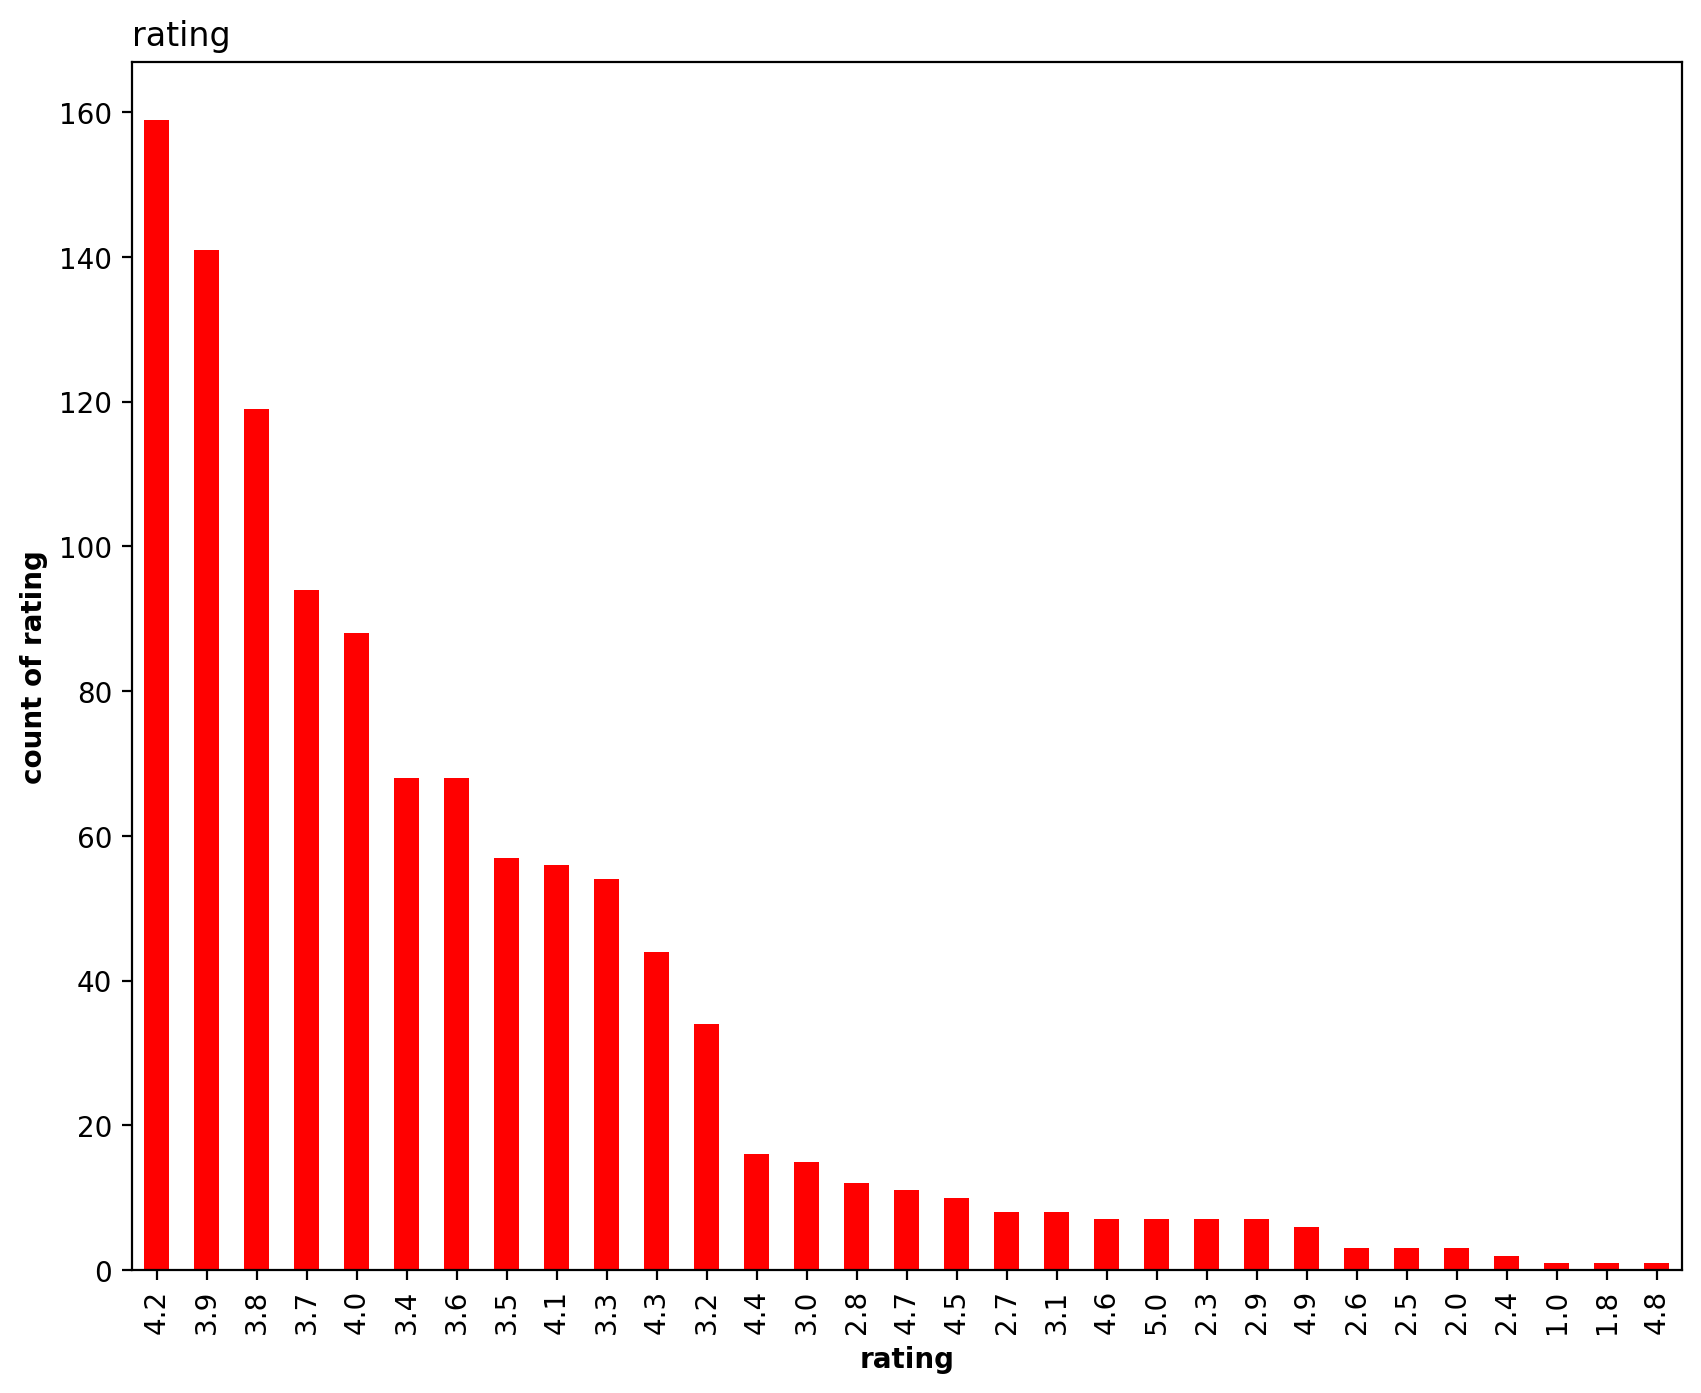

In [15]:
#bar plot for count of rating
fig, ax = plt.subplots(figsize=(10,8), dpi=200)
df['rating'].value_counts().plot(kind='bar',color ='red')
plt.xticks(rotation=90)
ax.set_title('rating', 
             loc ='left', ) 
plt.xlabel('rating', fontweight ='bold') 
plt.ylabel('count of rating', fontweight ='bold') ;

In [19]:
df_4 = df.dropna().groupby('state').mean().sort_values(by=['rating'])


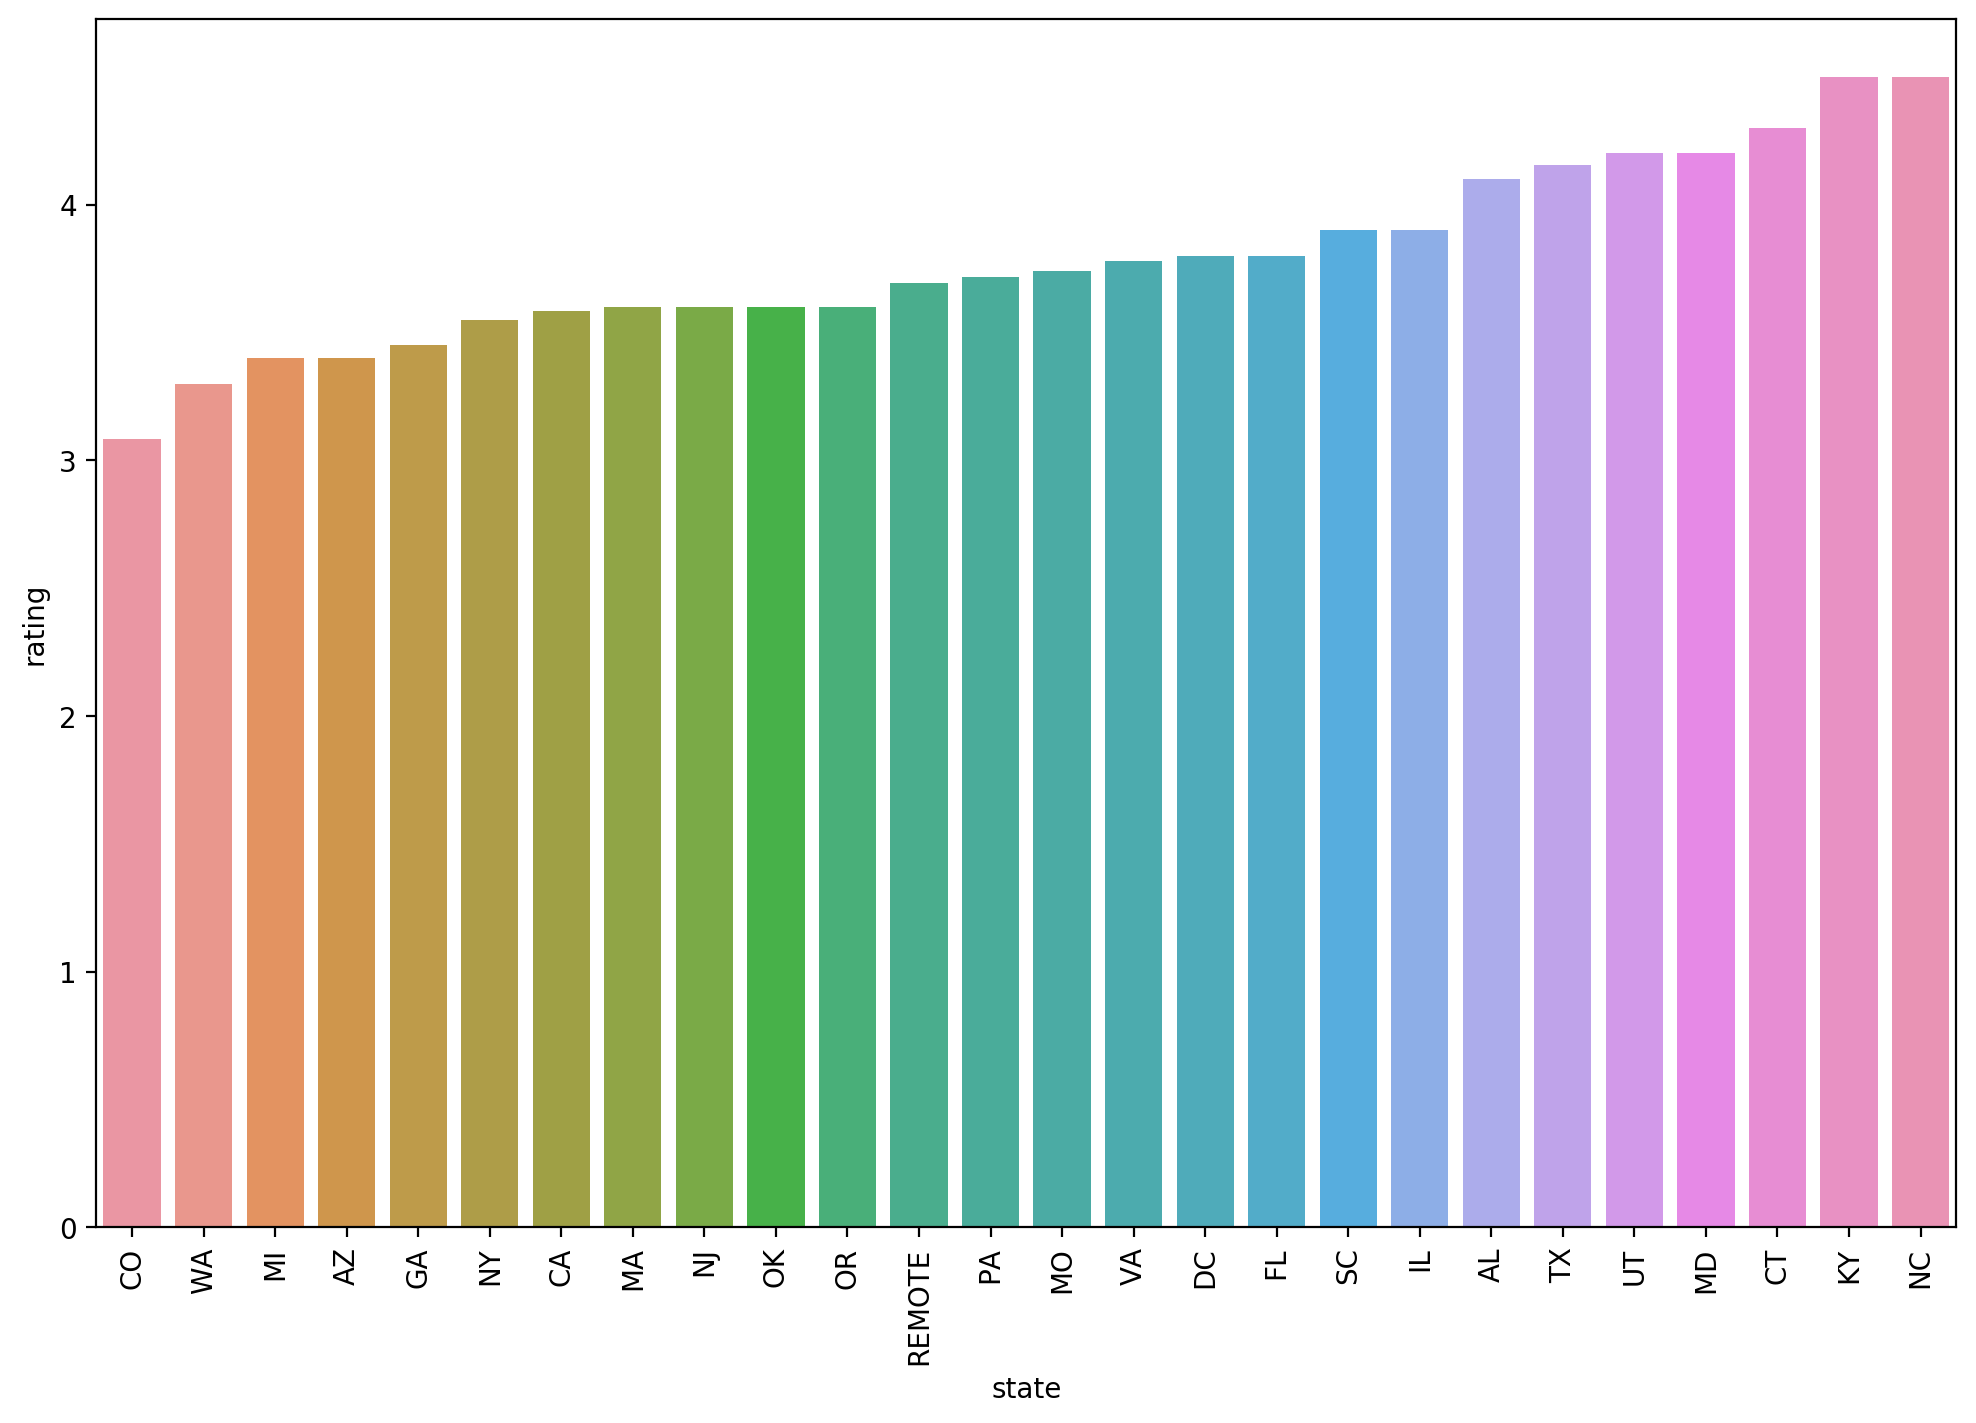

In [17]:
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(data=df_4, x=df_4.index, y='rating')
plt.xticks(rotation=90);

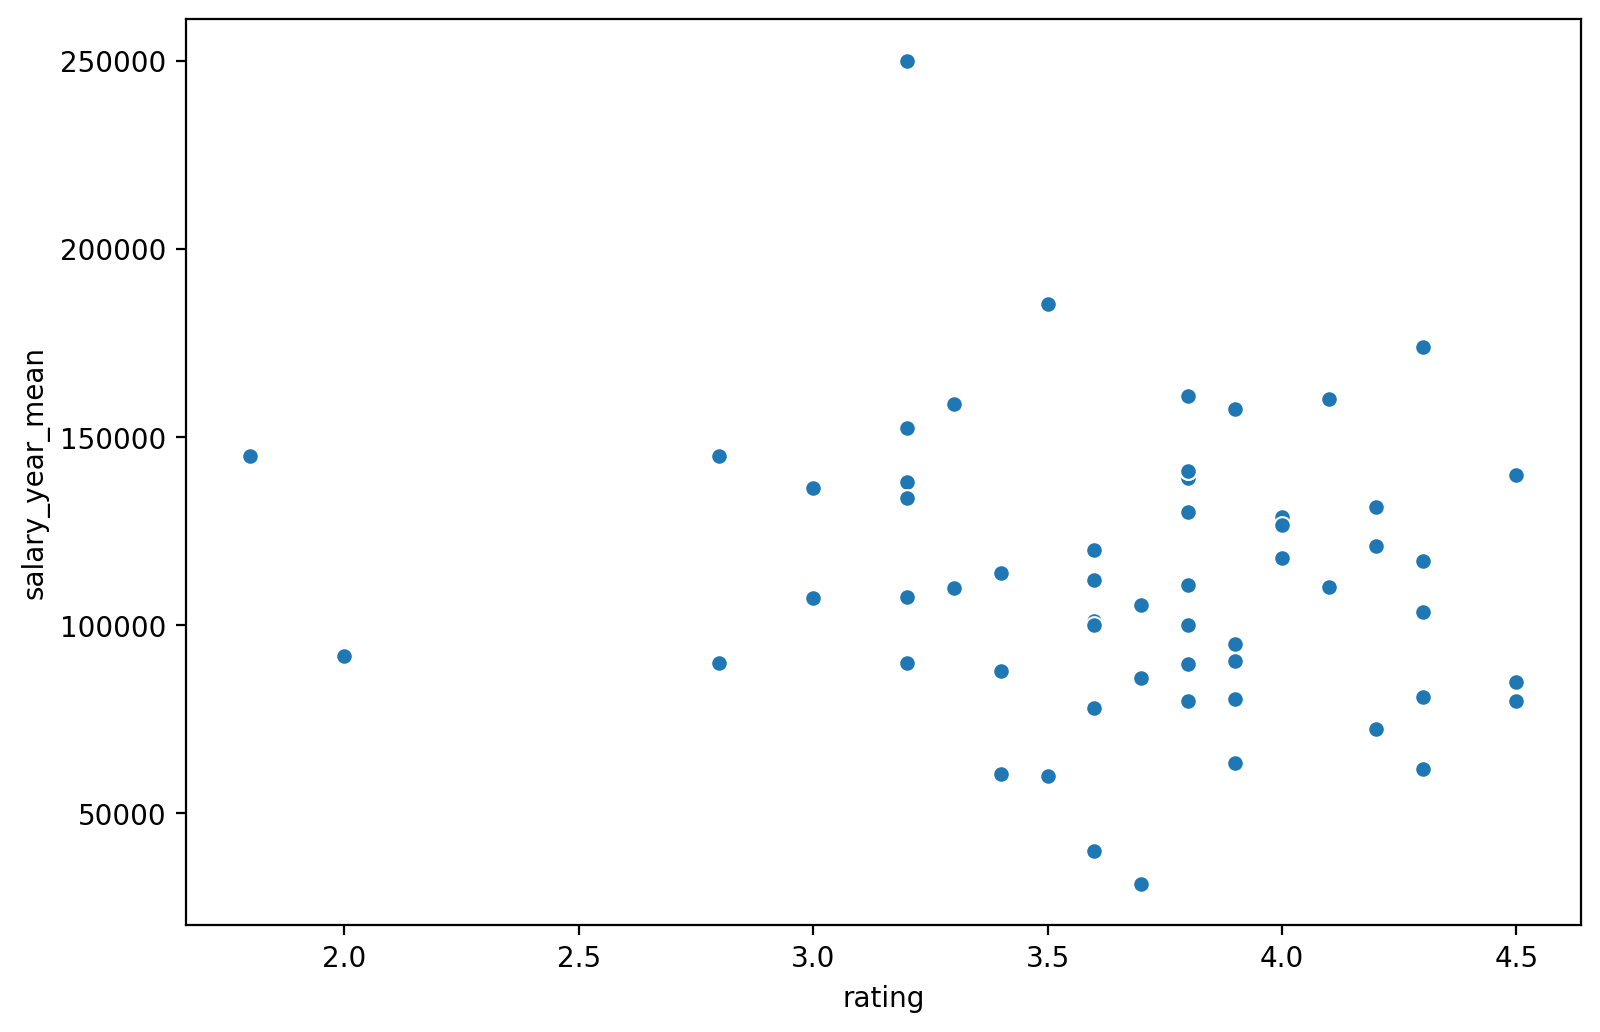

In [38]:
plt.figure(figsize=(9,6), dpi=200)
sns.scatterplot(data=df,x='rating',
                      y='salary_year_mean')#it seems there is no relationship between rating and salary

In [76]:
df[['salary_year_mean', 'rating']].notnull().sum()

salary_year_mean     223
rating              1110
dtype: int64

In [77]:
df.sort_values(by='rating',ascending=False)

,title,company,rating,CITY,state,salary_year_mean
309,Data Scientist,Digital Pharmacist,5.0,Austin,TX,NaN
1293,Senior Data Analyst,RedJack,5.0,Silver Spring,MD,NaN
883,Data Scientist,FourthWall Media,5.0,Sterling,VA,NaN
439,Data Scientist,Digital Pharmacist,5.0,Austin,TX,NaN
650,DATA SCIENTIST,XSOLIS,5.0,Nashville,TN,NaN
...,...,...,...,...,...,...
1459,Computer Vision / Machine learning Engineer,MyHHub,NaN,Folsom,CA,NaN
1467,Senior Machine Learning Scientist,Trueface,NaN,Los Angeles,CA,NaN
1471,Associate Data Center Project Coordinator,EZ Blockchain LLC,NaN,Chicago,IL,37050.0
1489,Senior Healthcare Data Analyst,Cambridge Advisory Group,NaN,King Of Prussia,PA,90000.0


In [33]:
df_3 = df.dropna().groupby('company').mean().sort_values(by=['salary_year_mean'])#get mean

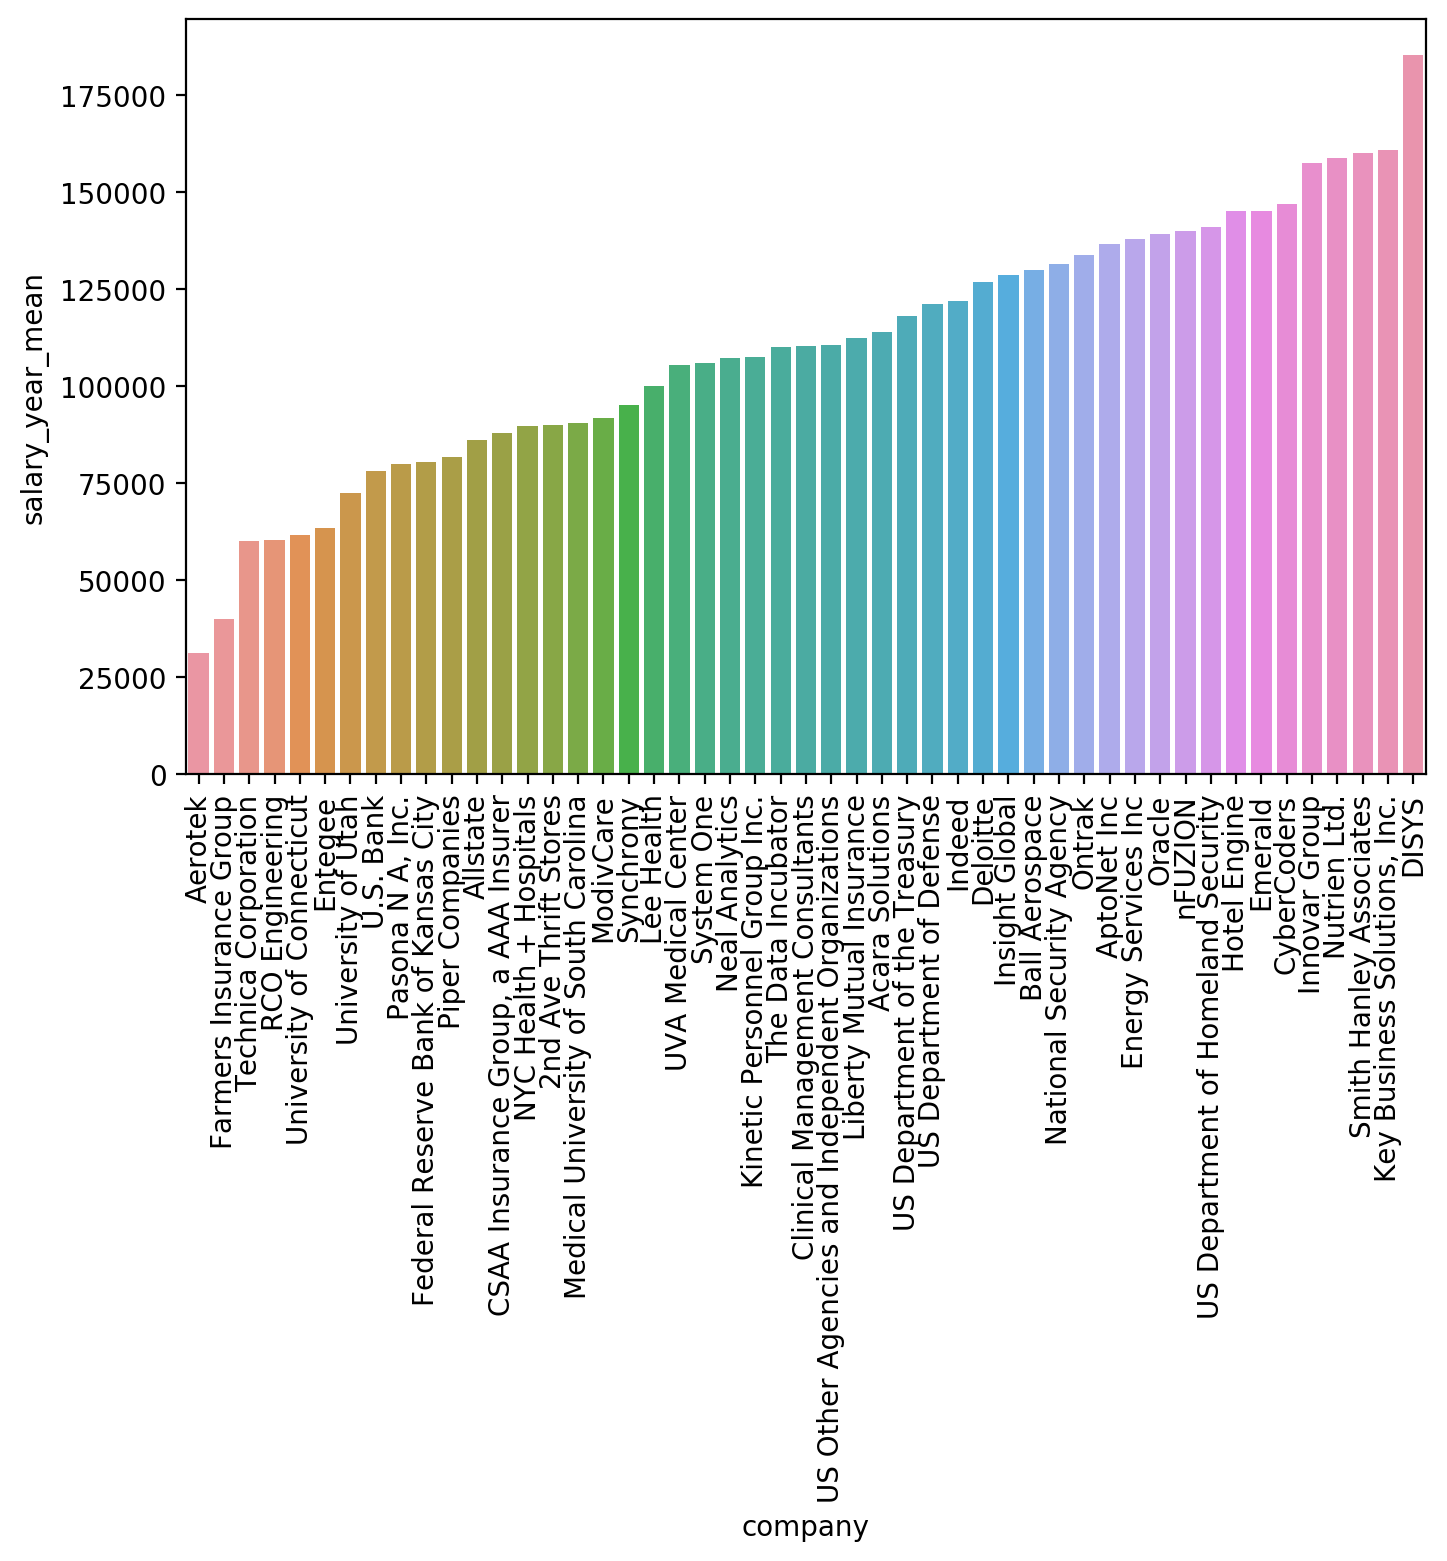

In [34]:
#get bar plot base on city and mean of salary
plt.figure(figsize=(8,5), dpi=200)
sns.barplot(data=df_3, x=df_3.index, y='salary_year_mean')
plt.xticks(rotation=90);#sorted plot